# Project work, part 1 - Dashboard basics

# General

- All project work in **IND320** will result in personal hand-ins and online apps.

1. **A Jupyter Notebook** run locally on your computer (later with access to online and local databases).
   - This will be your basic development and documentation platform.
   - Must include a brief description of **AI usage**.
   - Must include a **300–500 word log** describing the compulsory work (including both Jupyter Notebook and Streamlit experience).
   - Must include **links** to your public **GitHub repository** and **Streamlit app** (see below) for the compulsory work.
   - Document headings should be clear and usable for navigation during development.
   - All code blocks must include enough **comments** to be understandable and reproducible if someone inherits your project.
   - All code blocks must be **run before export to PDF** so messages and plots are shown. In addition, add the `.ipynb` file to the GitHub repository where you have your Streamlit project.

2. **A Streamlit app** running from `https://[yourproject].streamlit.app/`.
   - This will be an online version of the project, accessing data that has been exported to CSV format (later, also an online database).
   - The code, hosted at GitHub, must include relevant comments from the Jupyter Notebook and further comments regarding Streamlit usage.

- There are **four parts** in the project work, building on each other and resulting in a final portfolio and app to be presented at the end of the semester.
- **Co-operation is applauded**, and the use of **AI tools** is encouraged.

# Evaluation

- The uploaded **PDF**, **GitHub repository**, and **Streamlit app** will be assessed according to the recipe above.
  - By one fellow student in **peer review**.
  - By **Liland** or **Kjæreng**.
- TA/Teacher’s feedback will be **short and instructive**, regarding points of improvement and fulfilment of requirements.
- **Final fulfilment** of the course will be based on the **four rounds of hand-ins** seen as a whole.

---

# Tasks


## GitHub and Streamlit.app accounts

- Prepare a GitHub account and create a **public repository** for your project work.  
  Addresses at `streamlit.app` must be unique, so include your GitHub username or similar in the repository name.  
  Report the Streamlit address and GitHub repository address in the Jupyter Notebook.
- Log in to **[share.streamlit.io](https://share.streamlit.io/)** using your GitHub account.
- Create a **minimum working example** of a Streamlit app, push it to GitHub, and ensure it works at `https://[yourproject].streamlit.app/`.



Here are the links:
- Streamlit URL: https://ind320-rajvir-app-repo-mmma7ybzv7nuiev9exfsmq.streamlit.app/
- Github URL: https://github.com/rajern/ind320-rajvir

## Jupyter Notebook

- Read the supplied **CSV file** using **Pandas**.
- Print its contents in a relevant way.
- Plot **each column separately**.
- Plot **all columns together**. Consider how to make this natural, given that the scales are different.
- Remember to fill in the **log** and **AI** mentioned in the *General* section above.

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import os

# Define csv file 
file_csv = os.path.join('..', 'data', 'open-meteo-subset.csv')

# Read csv file
df = pd.read_csv(file_csv, parse_dates=["time"])        # load in the file and make time real datetimes
df = df.set_index("time").sort_index()                  # sort by time and make it index
df                                                      # show the dataframe

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
time,,,,,
2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284
...,...,...,...,...,...
2020-12-30 19:00:00,-6.5,0.0,1.6,4.0,58
2020-12-30 20:00:00,-7.0,0.0,1.2,3.4,50
2020-12-30 21:00:00,-7.5,0.0,1.1,2.4,22


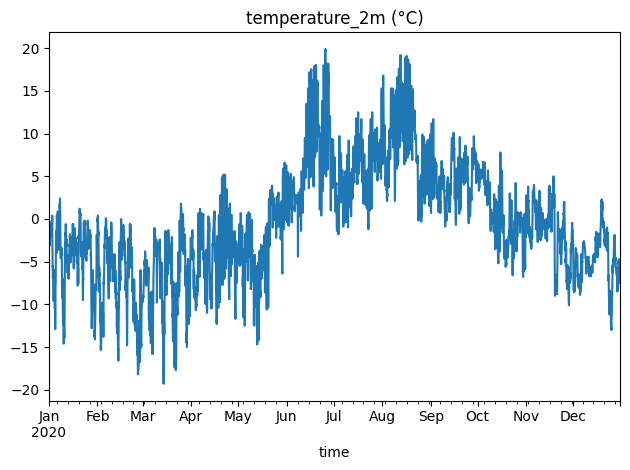

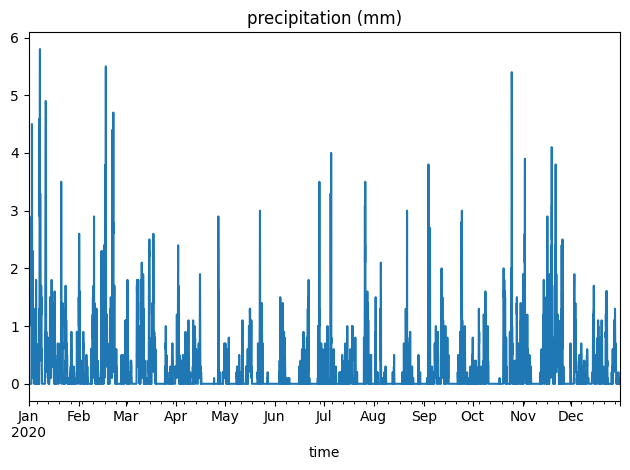

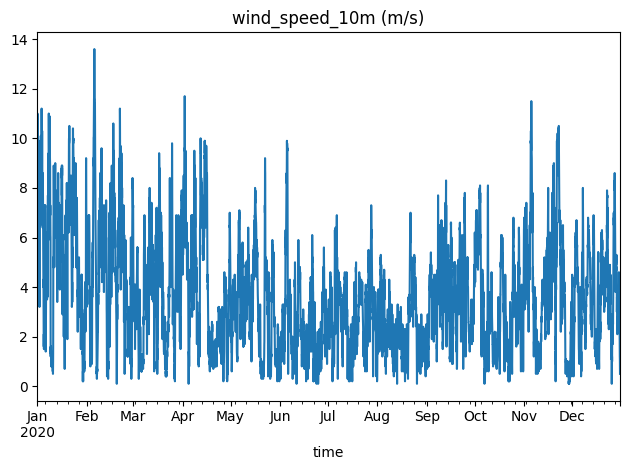

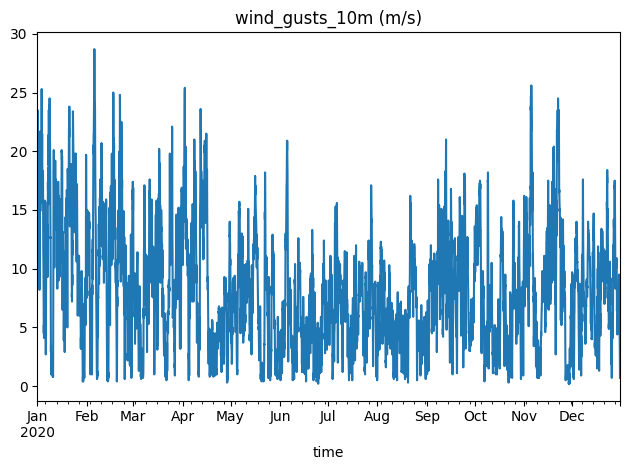

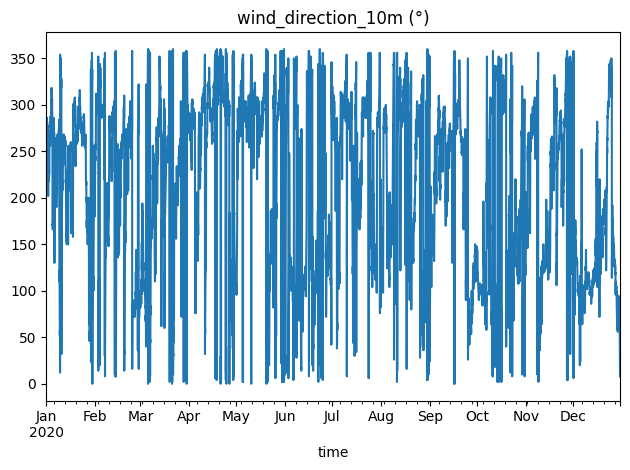

In [3]:
# Plot each column separately
for col in df.columns:
    plt.figure()
    df[col].plot()
    plt.title(col)
    plt.xlabel("time")
    plt.tight_layout()
    plt.show()

In [4]:
# Define name of direction column and normal columns
direction_col = "wind_direction_10m (°)"
normal_col = [c for c in df.columns if c != direction_col] 

# Unwrap direction so 360→0 jumps don’t spike
rad = np.deg2rad(df[direction_col].to_numpy())
direction_unwrapped = np.rad2deg(np.unwrap(rad))

# Combine linear cols + unwrapped direction
all_df = df[normal_col].copy()
all_df["wind_direction_unwrapped (°)"] = direction_unwrapped

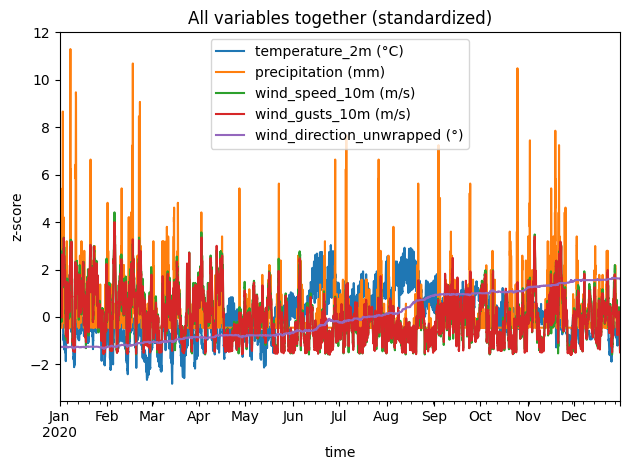

In [5]:
# Scale to comparable y-axis and plot once
Z = (all_df - all_df.mean()) / all_df.std(ddof=0)
Z.plot()
plt.title("All variables together (standardized)")
plt.xlabel("time"); 
plt.ylabel("z-score")
plt.tight_layout(); 
plt.show()

## Streamlit app

- Create a Streamlit app including:
  - `requirements.txt` (for package dependencies)
  - **Four pages** (with dummy headers and test contents for now)
    1. **Front/Home page** with a **sidebar menu** containing navigation options to the other pages.
    2. **Second page**
       - A **table** showing the imported data (see below).
       - Use the row-wise `LineChartColumn()` to display the **first month** of the data series.  
         There should be **one row in the table for each column** of the imported data.
    3. **Third page**
       - A **plot** of the imported data (see below), including header, axis titles, and other relevant formatting.
       - A **drop-down menu** (`st.selectbox`) choosing any single column in the CSV **or all columns together**.
       - A **selection slider** (`st.select_slider`) to select a subset of the months. Defaults should be the **first month**.
  - Data should be read from a **local CSV file** (`open-meteo-subset.csv`, available in Files in Canvas), **using caching** for app speed.

### Work Log:
**GitHub and Streamlit.app accounts**
- Created repository in Github. Cloned it inside Vscode. Created virtual environment for the project. Added req file + installed the neccessary packages, like streamlit. 
Then I created the minimal working streamlit_app.py, which I also ran locally using streamlit. 
For the next step I deployed streamlit through the web and created a public URL that anyone can access from any computer. I tried modifying the URL, but that didn't work, so I used the default one. 

**Jupyter Notebook**
- In this part I worked with the csv file given and plotted the columns. First I imported the packages needed. Then I read the file, made the time column into real dates, and set it as the index. I checked the first rows to see that the data looked correct. After that I made simple line plots for each column one by one. I also created one plot that showed all the columns together. To make them easier to compare I scaled the values and unwrapped the wind direction, so there were no big jumps from 360 back to 0.

**Streamlit app**
- I built a small Streamlit app. First, I fixed the layout: a main file (streamlit_app.py) and a pages/ folder for extra pages. I also added data_loader.py with st.cache_data to load the local CSV, parse the time column as dates, set it as the index, and return the DataFrame. On the Home page I show basic info, a short preview table, and the GitHub link. This confirms the data loads correctly. The Data table page shows one row per column. For each variable I take the first month of data and pass the values to a LineChartColumn, so the table includes a small sparkline for quick visual comparison. The page also states that only the first month is used. The Plot explorer page has a selectbox to choose one column or “All columns,” and a select_slider to choose a month range (default is the first month). It then draws a simple line plot with titles and axis labels.

### AI Usage (brief):
**GitHub and Streamlit.app accounts**
- Used AI to find documentation for what I wanted to create and for inspiration. Also used it for debugging when I came across issues. 

**Jupyter Notebook**
- Also used AI to faster find info on how to do the different operations. Such as reading and plotting the data. 
- Plus when getting inspiration for how to get all columns into the same plot. 

**Streamlit app**
- Used AI to help me create a step by step plan for what I should do in what order. 
- Here also to find functions easier and more efficiently, in addition to doing error handling. 